In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import logging
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Configure logging
logging.basicConfig(
    filename="global_layer_training.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="w"
)

logging.info("Starting Global Layer Training - Multi-Layer Perceptron (MLP)")

# Define dataset path
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"

# Load dataset with error handling
try:
    df = pd.read_csv(file_path)
    logging.info(f"Dataset loaded successfully from: {file_path}")
except Exception as e:
    logging.error(f"Error loading dataset: {str(e)}")
    raise

# Define selected features for Global Layer
global_features = [
    "Dst Port", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Fwd Pkts",
    "TotLen Bwd Pkts", "Elapsed_Time"
]

# Validate feature existence
missing_features = [feature for feature in global_features if feature not in df.columns]
if missing_features:
    logging.error(f"Missing features in dataset: {missing_features}")
    raise ValueError(f"Dataset does not contain required features: {missing_features}")

# Extract features and labels
X = df[global_features]
y = df['Label']  # Assuming 'Label' contains multiple attack classes

# Encode labels as categorical integers (Multi-Class Classification)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts categorical classes into numerical values

# Log label mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
logging.info(f"Label Mapping: {label_mapping}")

# Convert to correct data types
X = X.astype(np.float32)
y = y.astype(np.int32)

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
logging.info("Feature scaling completed using StandardScaler.")

# Define Multi-Layer Perceptron (MLP) model
mlp_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(label_mapping), activation='softmax')  # Multi-Class Classification
])

# Compile the model for Multi-Class Classification
mlp_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

logging.info("MLP model architecture defined and compiled.")

# Implement Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with timing
start_time = time.time()
history = mlp_model.fit(
    X_train, y_train,
    epochs=50, batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)
training_time = time.time() - start_time
logging.info(f"Model training completed in {training_time:.2f} seconds.")

# Make predictions
y_pred = np.argmax(mlp_model.predict(X_test), axis=1)  # Get predicted class indices

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Log and print evaluation metrics
logging.info(f"Accuracy: {accuracy:.4f}")
logging.info(f"Precision: {precision:.4f}")
logging.info(f"Recall: {recall:.4f}")
logging.info(f"F1-Score: {f1:.4f}")

print("\n=== Global Layer (MLP) - Performance Metrics ===")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Save trained model for future use in Core Layer
model_save_path = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Global_Layer_MLP_MultiClass.h5"
mlp_model.save(model_save_path)
logging.info(f"Model saved successfully at {model_save_path}")
print(f"Model saved successfully at: {model_save_path}")

Epoch 1/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 15s 513us/step - accuracy: 0.9648 - loss: 0.1232 - val_accuracy: 0.9697 - val_loss: 0.0947
Epoch 2/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 15s 515us/step - accuracy: 0.9695 - loss: 0.0959 - val_accuracy: 0.9697 - val_loss: 0.0958
Epoch 3/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 15s 513us/step - accuracy: 0.9696 - loss: 0.0957 - val_accuracy: 0.9698 - val_loss: 0.0950
Epoch 4/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 14s 507us/step - accuracy: 0.9697 - loss: 0.0959 - val_accuracy: 0.9698 - val_loss: 0.0936
Epoch 5/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 14s 510us/step - accuracy: 0.9697 - loss: 0.0988 - val_accuracy: 0.9698 - val_loss: 0.0936
Epoch 6/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 14s 510us/step - accuracy: 0.9699 - loss: 0.0954 - val_accuracy: 0.9698 - val_loss: 0.0947
Epoch 7/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 15s 514us/step - accuracy: 0.9696 - loss: 0.0956 - val_accuracy: 0.9698 - val_loss: 0.0948
Epoch 8/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 14s 508us/s

In [25]:
# Save the original LSTM model in the recommended `.keras` format
MODEL_SAVE_PATH_NEW = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Global_Layer_MLP_MultiClass.keras"

# Save in the new Keras format
mlp_model.save(MODEL_SAVE_PATH_NEW)

# Log confirmation
logging.info(f"Global Layer MLP model saved successfully in Keras format at: {MODEL_SAVE_PATH_NEW}")

In [31]:
# Print model summary to confirm input shape
global_model.summary()

# Extract feature importance only if dimensions match
def get_mlp_feature_importance(model, feature_names):
    """
    Extracts feature importance from the first layer of the MLP model.
    Ensures correct mapping between feature count and weights.
    """
    weights = model.layers[0].get_weights()[0]  # Extract first layer weights

    # Check if weight dimensions match feature count
    if weights.shape[0] != len(feature_names):
        raise ValueError(f"Feature count mismatch! Model expects {weights.shape[0]} but got {len(feature_names)}")

    importance = np.mean(np.abs(weights), axis=1)
    return pd.DataFrame({'Feature': feature_names, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Extract and validate
logging.info("Extracting Global Layer feature importance...")
mlp_feature_importance = get_mlp_feature_importance(global_model, GLOBAL_FEATURES)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,000 (101.57 KB)

 Trainable params: 12,999 (50.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,001 (50.79 KB)

ValueError: Feature count mismatch! Model expects 18 but got 14

/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_22120/2337975713.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=mlp_feature_importance, palette='Blues_r')


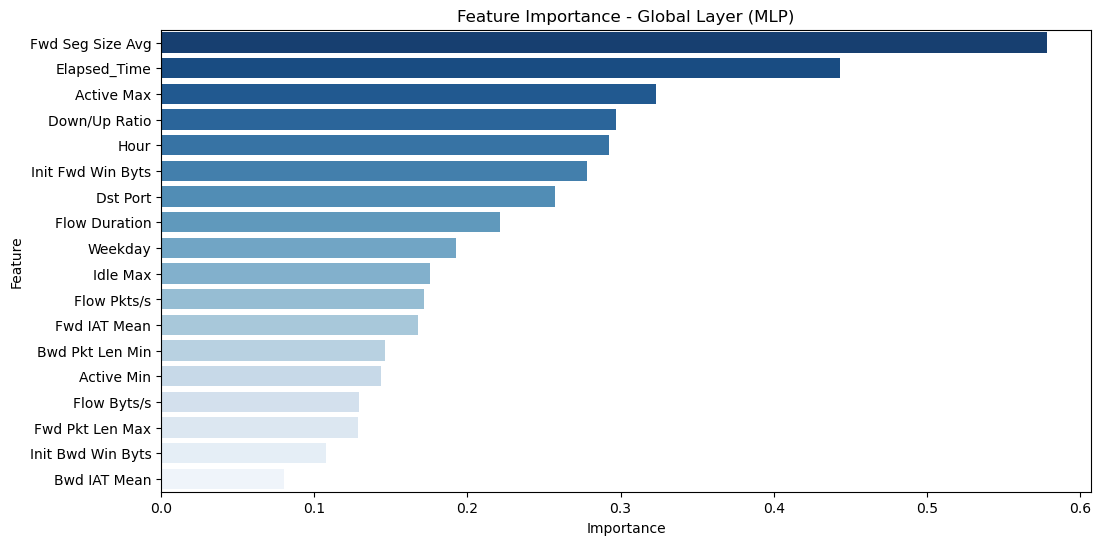

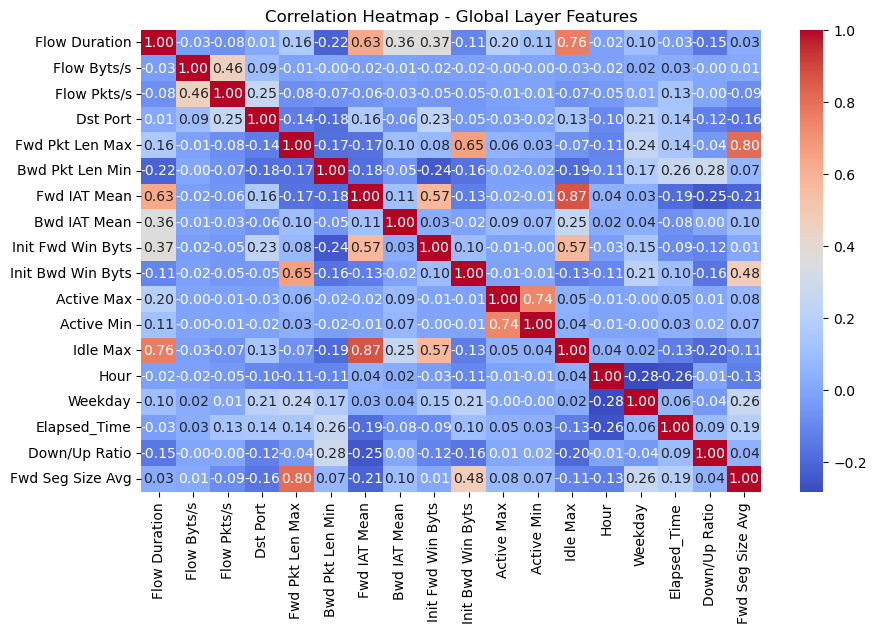

In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# File paths
GLOBAL_MODEL_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Global_Layer_MLP.keras"
DATASET_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"

# Load dataset
logging.info("Loading dataset for Global Layer...")
df = pd.read_csv(DATASET_PATH)

# Global Layer Features
GLOBAL_FEATURES = [
    "Flow Duration", "Flow Byts/s", "Flow Pkts/s", "Dst Port",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "Fwd IAT Mean", "Bwd IAT Mean",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Active Max", "Active Min",
    "Idle Max", "Hour", "Weekday", "Elapsed_Time", "Down/Up Ratio", "Fwd Seg Size Avg"
]

# Standardization
scaler = StandardScaler()
df[GLOBAL_FEATURES] = scaler.fit_transform(df[GLOBAL_FEATURES])

# Load Global Layer Model
logging.info("Loading Global Layer MLP model...")
global_model = load_model(GLOBAL_MODEL_PATH)

# Extract Feature Importance from MLP
def get_mlp_feature_importance(model, feature_names):
    """
    Extracts feature importance from the first layer of the MLP model.
    """
    weights = model.layers[0].get_weights()[0]
    importance = np.mean(np.abs(weights), axis=1)
    return pd.DataFrame({'Feature': feature_names, 'Importance': importance}).sort_values(by='Importance', ascending=False)

logging.info("Extracting Global Layer feature importance...")
mlp_feature_importance = get_mlp_feature_importance(global_model, GLOBAL_FEATURES)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=mlp_feature_importance, palette='Blues_r')
plt.title('Feature Importance - Global Layer (MLP)')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[GLOBAL_FEATURES].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Global Layer Features")
plt.show()

logging.info("Global Layer Analysis Complete.")


Global Layer Feature Statistics:
       Flow Duration   Flow Byts/s   Flow Pkts/s      Dst Port  \
count   2.270317e+06  2.270317e+06  2.270317e+06  2.270317e+06   
mean    1.557901e+07  1.992668e+05  3.275179e+04  6.154646e+03   
std     3.166631e+07  3.312683e+06  2.099971e+05  1.565928e+04   
min     1.000000e+00  0.000000e+00  1.666783e-02  0.000000e+00   
25%     9.430000e+02  0.000000e+00  6.748447e-01  8.000000e+01   
50%     1.122852e+06  6.523648e+02  7.531230e+00  8.000000e+01   
75%     8.998500e+06  7.409264e+03  2.275313e+03  4.450000e+02   
max     1.200000e+08  1.230000e+09  4.000000e+06  6.553400e+04   

       Fwd Seg Size Avg  Elapsed_Time    Active Max  Down/Up Ratio  \
count      2.270317e+06  2.270317e+06  2.270317e+06   2.270317e+06   
mean       3.623258e+01  7.201929e+05  2.093652e+05   5.291380e-01   
std        5.425407e+01  2.725894e+05  2.604577e+06   7.670413e-01   
min        0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%        0.000000e+

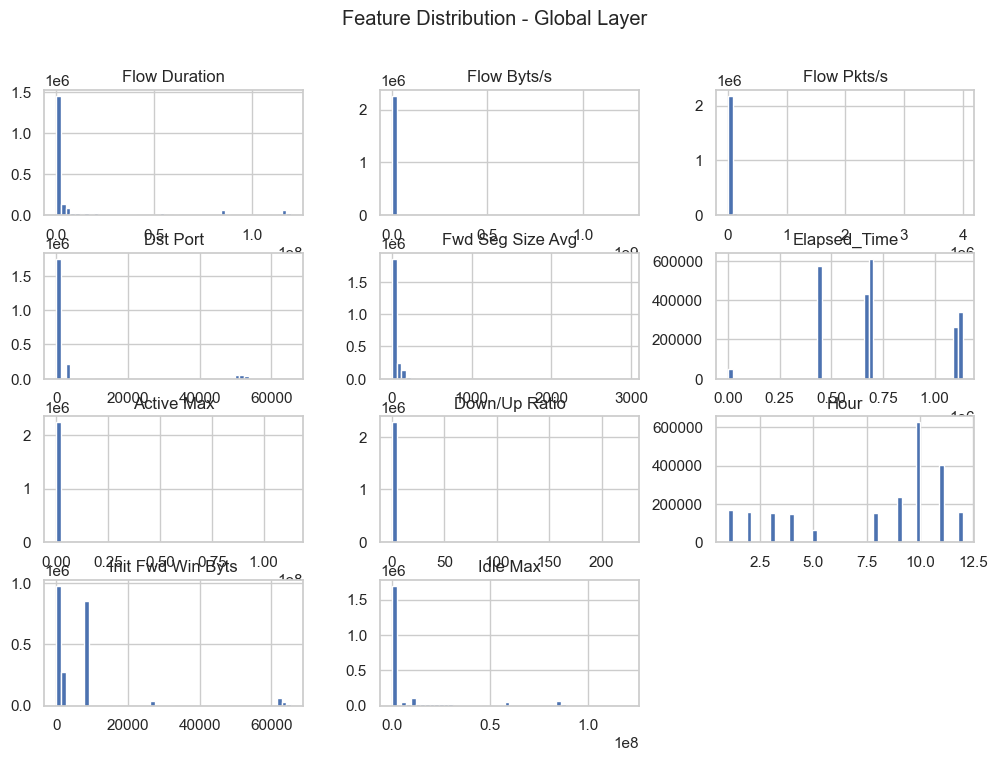

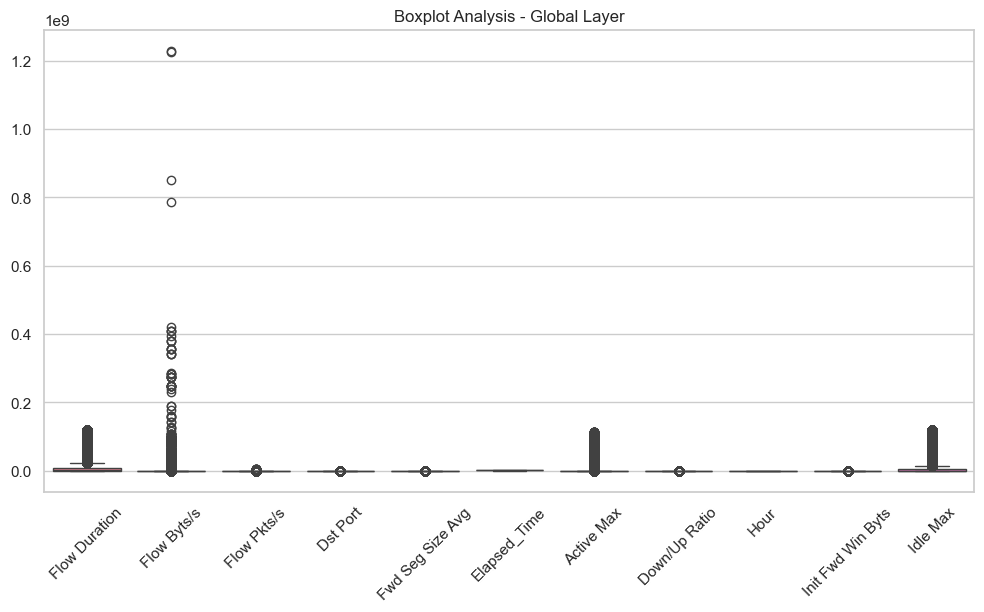

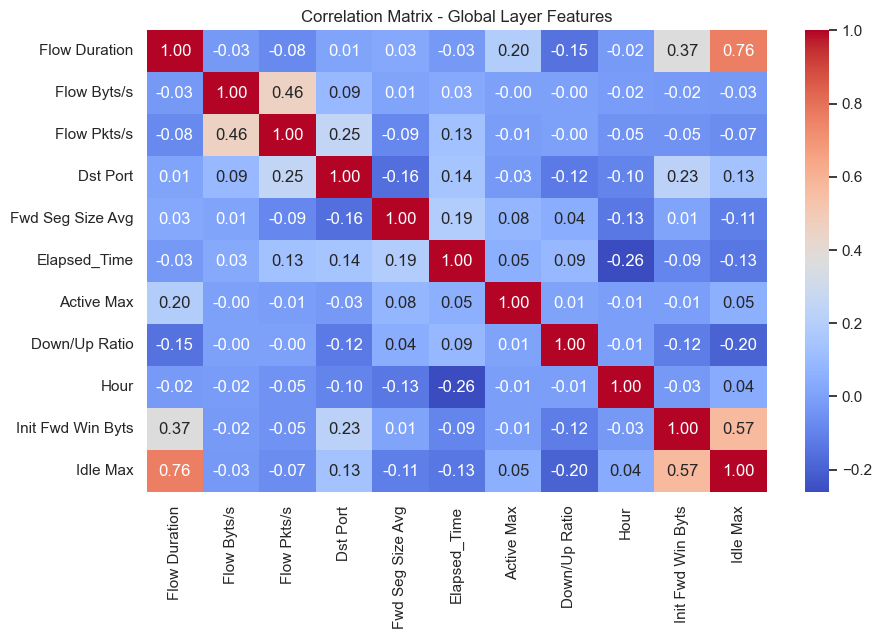

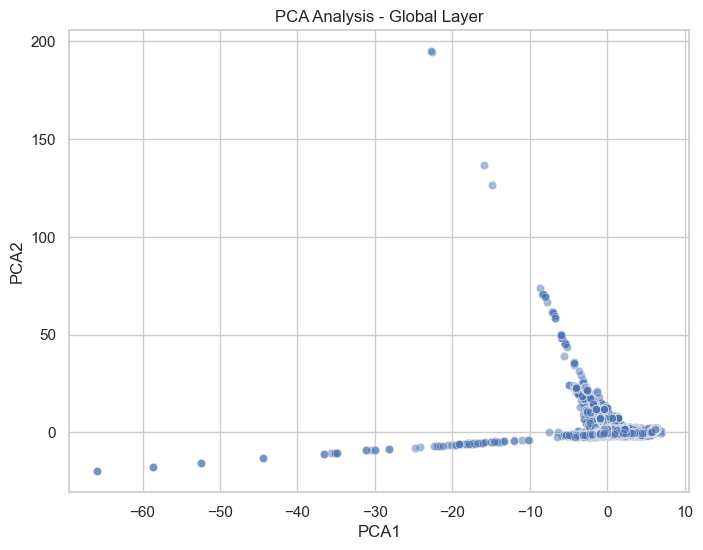

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configure display settings
sns.set(style="whitegrid")

# Load Dataset
DATASET_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(DATASET_PATH)

# Global Layer Features
GLOBAL_FEATURES = [
    "Flow Duration", "Flow Byts/s", "Flow Pkts/s", "Dst Port",
    "Fwd Seg Size Avg", "Elapsed_Time", "Active Max", "Down/Up Ratio",
    "Hour", "Init Fwd Win Byts", "Idle Max"
]

df_global = df[GLOBAL_FEATURES].copy()

# **1. Statistical Summary**
print("\nGlobal Layer Feature Statistics:")
print(df_global.describe())

# **2. Feature Distribution - Histograms**
df_global.hist(figsize=(12, 8), bins=50)
plt.suptitle("Feature Distribution - Global Layer")
plt.show()

# **3. Boxplots for Outlier Detection**
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_global)
plt.xticks(rotation=45)
plt.title("Boxplot Analysis - Global Layer")
plt.show()

# **4. Correlation Matrix**
plt.figure(figsize=(10, 6))
sns.heatmap(df_global.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - Global Layer Features")
plt.show()

# **5. PCA Analysis**
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_global)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df_pca = pd.DataFrame(data=pca_result, columns=["PCA1", "PCA2"])

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", data=df_pca, alpha=0.5)
plt.title("PCA Analysis - Global Layer")
plt.show()


Edge Layer Feature Statistics:
       Fwd IAT Mean  Bwd IAT Mean   Flow Byts/s   Pkt Len Min   Pkt Len Max  \
count  2.270317e+06  2.270317e+06  2.270317e+06  2.270317e+06  2.270317e+06   
mean   7.840275e+06  8.775655e+05  1.992668e+05  9.932714e+00  4.036946e+02   
std    1.957844e+07  4.947804e+06  3.312683e+06  2.584234e+01  5.174633e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.300000e+01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    1.666450e+04  0.000000e+00  6.523648e+02  0.000000e+00  9.100000e+01   
75%    2.671824e+06  3.689603e+05  7.409264e+03  0.000000e+00  9.640000e+02   
max    1.199916e+08  1.199444e+08  1.230000e+09  1.274000e+03  3.146900e+04   

       Fwd Pkt Len Max  Bwd Pkt Len Min      Idle Max    Active Min  \
count     2.270317e+06     2.270317e+06  2.270317e+06  2.270317e+06   
mean      1.370873e+02     2.274777e+01  8.824746e+06  9.571855e+04   
std       2.492628e+02     4.848438e+01  2.

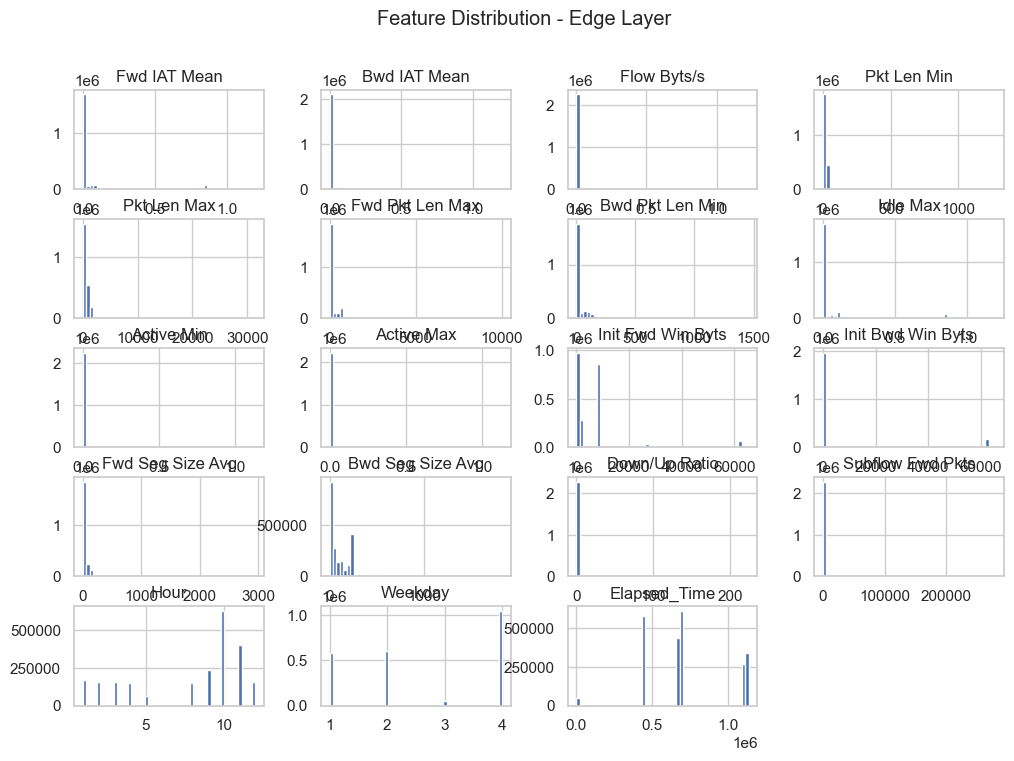

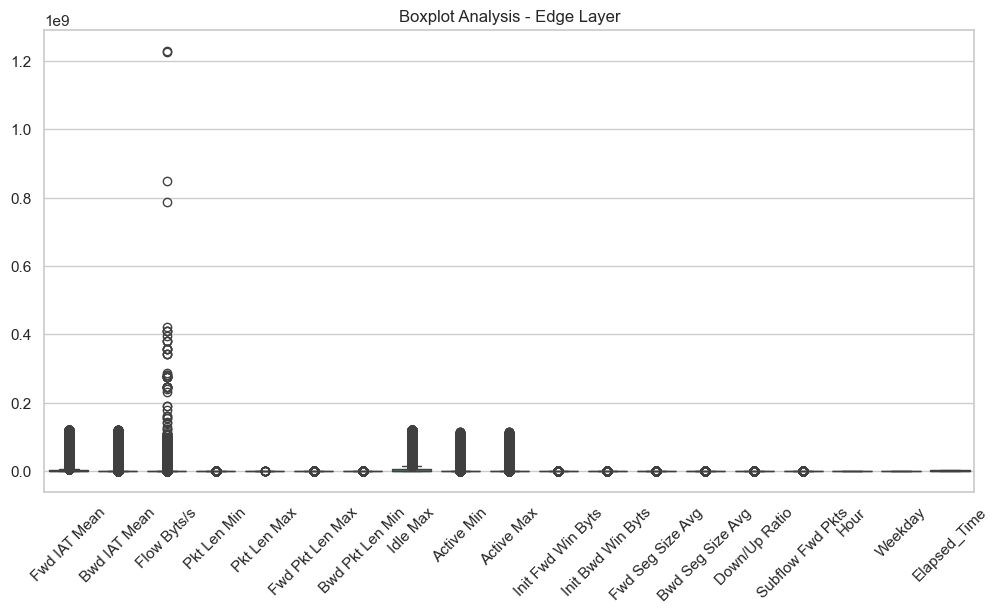

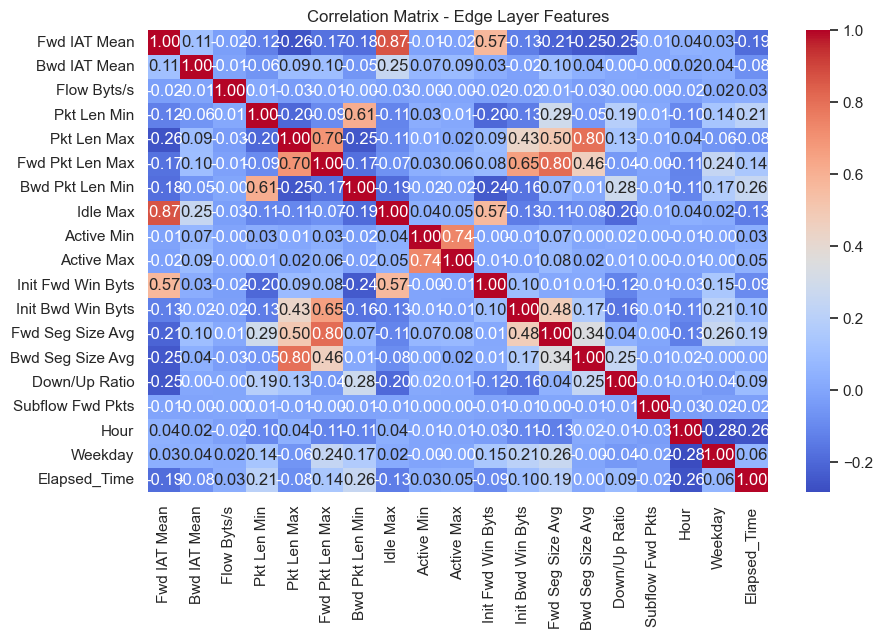

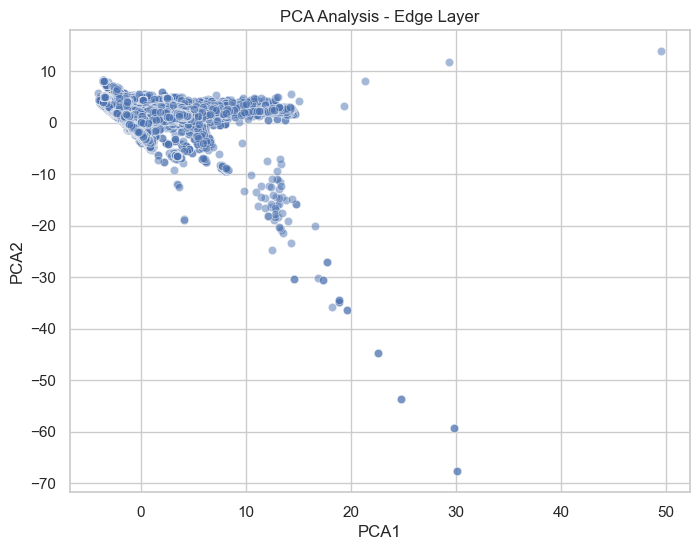

In [7]:
# Load Dataset
df_edge = df.copy()

# Edge Layer Features
EDGE_FEATURES = [
    "Fwd IAT Mean", "Bwd IAT Mean", "Flow Byts/s", "Pkt Len Min",
    "Pkt Len Max", "Fwd Pkt Len Max", "Bwd Pkt Len Min", "Idle Max",
    "Active Min", "Active Max", "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Fwd Seg Size Avg", "Bwd Seg Size Avg", "Down/Up Ratio", "Subflow Fwd Pkts",
    "Hour", "Weekday", "Elapsed_Time"
]

df_edge = df[EDGE_FEATURES].copy()

# **1. Statistical Summary**
print("\nEdge Layer Feature Statistics:")
print(df_edge.describe())

# **2. Feature Distribution - Histograms**
df_edge.hist(figsize=(12, 8), bins=50)
plt.suptitle("Feature Distribution - Edge Layer")
plt.show()

# **3. Boxplots for Outlier Detection**
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_edge)
plt.xticks(rotation=45)
plt.title("Boxplot Analysis - Edge Layer")
plt.show()

# **4. Correlation Matrix**
plt.figure(figsize=(10, 6))
sns.heatmap(df_edge.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - Edge Layer Features")
plt.show()

# **5. PCA Analysis**
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_edge)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df_pca = pd.DataFrame(data=pca_result, columns=["PCA1", "PCA2"])

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", data=df_pca, alpha=0.5)
plt.title("PCA Analysis - Edge Layer")
plt.show()


🔹 Device Layer Feature Statistics:
           Dst Port    Fwd Pkts/s    Bwd Pkts/s  Fwd Pkt Len Max  \
count  2.270317e+06  2.270317e+06  2.270317e+06     2.270317e+06   
mean   6.154646e+03  2.434160e+04  8.410192e+03     1.370873e+02   
std    1.565928e+04  1.794467e+05  6.577704e+04     2.492628e+02   
min    0.000000e+00  8.566364e-03  0.000000e+00     0.000000e+00   
25%    8.000000e+01  4.055018e-01  0.000000e+00     0.000000e+00   
50%    8.000000e+01  3.878337e+00  2.673874e+00     3.100000e+01   
75%    4.450000e+02  1.180638e+03  7.416197e+01     9.700000e+01   
max    6.553400e+04  4.000000e+06  2.000000e+06     1.002400e+04   

       Bwd Pkt Len Min  Init Fwd Win Byts  Init Bwd Win Byts    Active Max  \
count     2.270317e+06       2.270317e+06       2.270317e+06  2.270317e+06   
mean      2.274777e+01       6.996281e+03       6.489780e+03  2.093652e+05   
std       4.848438e+01       1.348659e+04       1.849236e+04  2.604577e+06   
min       0.000000e+00      -1.000000e+

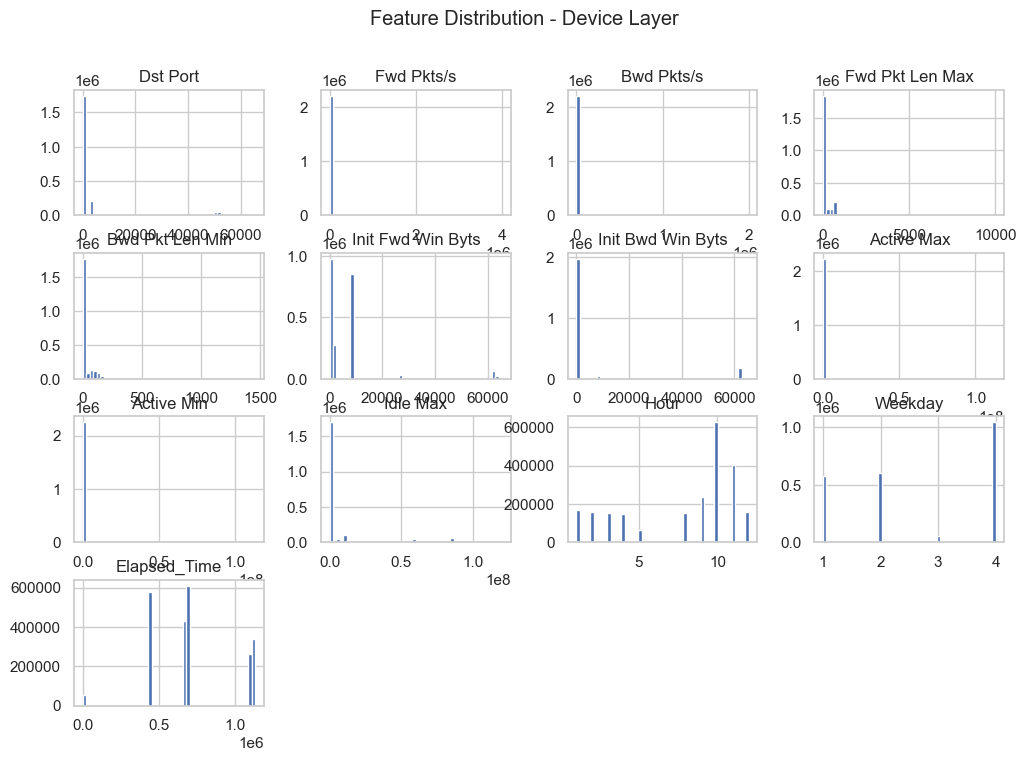

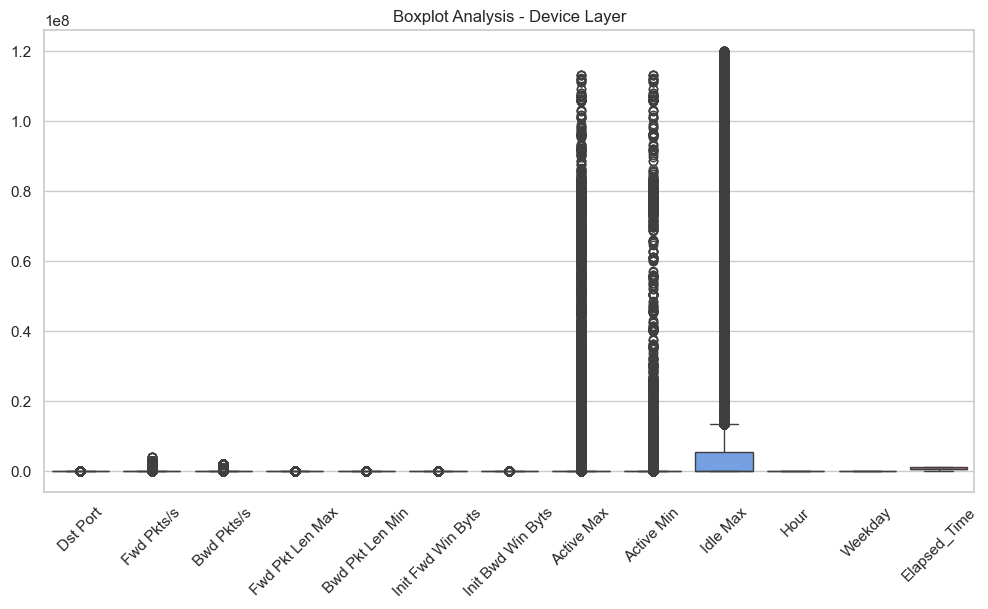

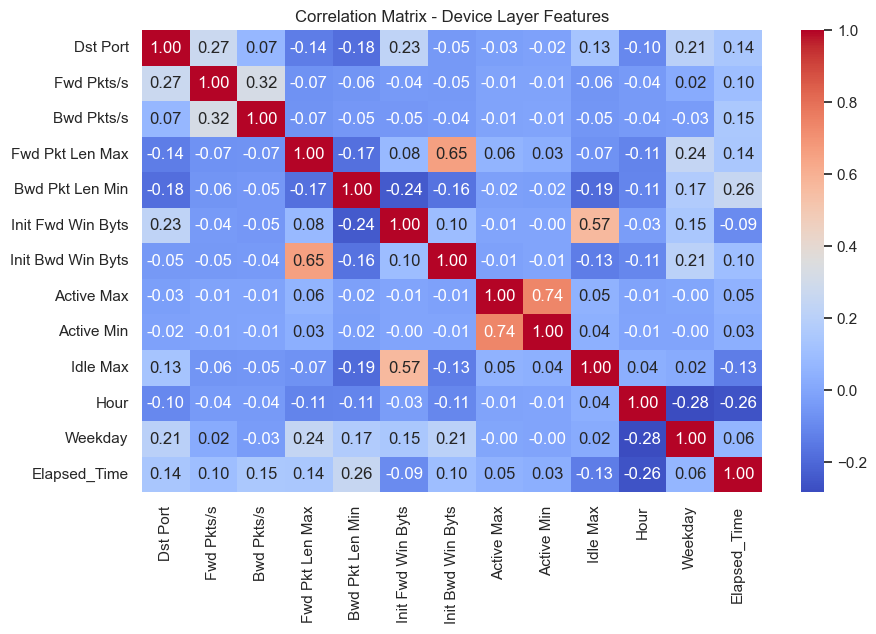

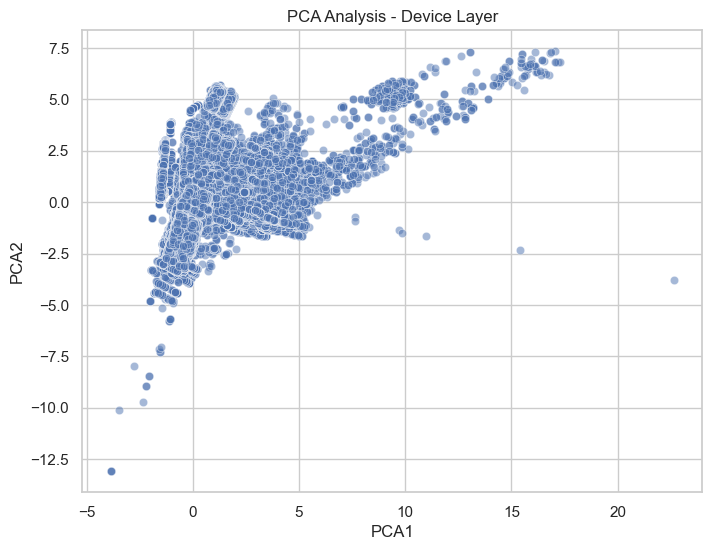

In [8]:
# Load Dataset
df_device = df.copy()

# Device Layer Features
DEVICE_FEATURES = [
    "Dst Port", "Fwd Pkts/s", "Bwd Pkts/s", "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Active Max", "Active Min",
    "Idle Max", "Hour", "Weekday", "Elapsed_Time"
]

df_device = df[DEVICE_FEATURES].copy()

# **1. Statistical Summary**
print("\nDevice Layer Feature Statistics:")
print(df_device.describe())

# **2. Feature Distribution - Histograms**
df_device.hist(figsize=(12, 8), bins=50)
plt.suptitle("Feature Distribution - Device Layer")
plt.show()

# **3. Boxplots for Outlier Detection**
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_device)
plt.xticks(rotation=45)
plt.title("Boxplot Analysis - Device Layer")
plt.show()

# **4. Correlation Matrix**
plt.figure(figsize=(10, 6))
sns.heatmap(df_device.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - Device Layer Features")
plt.show()

# **5. PCA Analysis**
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_device)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df_pca = pd.DataFrame(data=pca_result, columns=["PCA1", "PCA2"])

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", data=df_pca, alpha=0.5)
plt.title("PCA Analysis - Device Layer")
plt.show()

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# File paths
GLOBAL_MODEL_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Global/xgb_global_model.pkl"
DATASET_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"

# Load dataset
logging.info("Loading dataset for Global Layer...")
df = pd.read_csv(DATASET_PATH)
global_features = [
    "Flow Duration", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "Dst Port", "Protocol", "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Fwd Pkts", "TotLen Bwd Pkts",
    "Hour_sin", "Hour_cos", "Weekday_sin", "Weekday_cos"
]

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[global_features].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap - Global Layer Features")
plt.show()

2025-04-01 01:21:32,398 - INFO - Loading dataset for Global Layer...


KeyError: "['Hour_sin', 'Hour_cos', 'Weekday_sin', 'Weekday_cos'] not in index"

<Figure size 1000x600 with 0 Axes>

In [24]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Load dataset
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df = pd.read_csv(file_path)

# Define Global Layer features
global_features = [
    "Flow Duration", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "Dst Port", "Protocol", "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Fwd Pkts", "TotLen Bwd Pkts",
    "Hour_sin", "Hour_cos", "Weekday_sin", "Weekday_cos"
]

# Selecting features and label
X = df[global_features]
y = df["Label"]  # Target variable

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert string labels to numeric

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Train Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=300,  # 300 trees
    max_depth=10,  # Prevent overfitting
    min_samples_split=5,  # Minimum samples per split
    min_samples_leaf=2,  # Minimum samples per leaf
    class_weight="balanced",  # Helps with imbalanced classes
    random_state=42,
    n_jobs=-1  # Use all available cores
)

print("Training Random Forest Model...")
rf_model.fit(X_train, y_train)
print("Training Completed.")

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_)

print(f"\nRandom Forest Model Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report (Random Forest):\n", classification_report_rf)

Training Random Forest Model...
Training Completed.

Random Forest Model Accuracy: 0.8981

Classification Report (Random Forest):
                         precision    recall  f1-score   support

                Benign       1.00      0.85      0.92    314734
      Brute Force -Web       0.03      0.97      0.05        72
      Brute Force -XSS       0.02      0.97      0.04        30
DDoS attacks-LOIC-HTTP       1.00      1.00      1.00    115235
 DoS attacks-GoldenEye       1.00      1.00      1.00      8291
 DoS attacks-Slowloris       1.00      1.00      1.00      2057
         Infilteration       0.24      1.00      0.39     13645

              accuracy                           0.90    454064
             macro avg       0.61      0.97      0.63    454064
          weighted avg       0.98      0.90      0.93    454064



In [22]:
import pandas as pd
import xgboost as xgb
import logging
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Configure logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)

# Load dataset
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df = pd.read_csv(file_path)

# Define Global Layer features
global_features = [
    "Flow Duration", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "Dst Port", "Protocol", "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Fwd Pkts", "TotLen Bwd Pkts",
    "Hour_sin", "Hour_cos", "Weekday_sin", "Weekday_cos"
]

logging.info("Dataset Loaded. Selecting features...")

# Selecting features and label
X = df[global_features]
y = df["Label"]  # Target variable

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

logging.info(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
logging.info("Starting XGBoost Model Training...")

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=len(label_encoder.classes_),  # Ensure correct number of classes
    eval_metric="mlogloss",
    use_label_encoder=False,
    n_estimators=300,  # More trees for better performance
    max_depth=7,  # Controls model complexity
    learning_rate=0.1,  # Adjust for better convergence
    subsample=0.8,  # Reduces overfitting
    colsample_bytree=0.8,  # Feature sampling
    scale_pos_weight=1  # Adjust for class imbalance if needed
)

xgb_model.fit(X_train, y_train)

logging.info("XGBoost Model Training Completed. Generating Predictions...")

# Predictions
y_pred = xgb_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

logging.info(f"Model Accuracy: {accuracy:.4f}")
print(f"Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report_str)

2025-03-19 18:54:29,659 - INFO - Dataset Loaded. Selecting features...
2025-03-19 18:54:30,476 - INFO - Training samples: 1816253, Testing samples: 454064
2025-03-19 18:54:30,476 - INFO - Starting XGBoost Model Training...
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:54:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025-03-19 18:55:51,143 - INFO - XGBoost Model Training Completed. Generating Predictions...
2025-03-19 18:55:53,405 - INFO - Model Accuracy: 0.9704


Model Accuracy: 0.9704

Classification Report:
                         precision    recall  f1-score   support

                Benign       0.96      1.00      0.98    314734
      Brute Force -Web       0.85      0.54      0.66        72
      Brute Force -XSS       1.00      0.67      0.80        30
DDoS attacks-LOIC-HTTP       1.00      1.00      1.00    115235
 DoS attacks-GoldenEye       1.00      1.00      1.00      8291
 DoS attacks-Slowloris       1.00      1.00      1.00      2057
         Infilteration       0.62      0.05      0.09     13645

              accuracy                           0.97    454064
             macro avg       0.92      0.75      0.79    454064
          weighted avg       0.96      0.97      0.96    454064



2025-03-25 18:27:47,568 - INFO - Dataset loaded successfully.
2025-03-25 18:27:47,571 - INFO - Selecting Global layer features...
2025-03-25 18:27:48,351 - INFO - Training samples: 1816253, Testing samples: 454064
2025-03-25 18:27:48,351 - INFO - Starting XGBoost Model Training...
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:27:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025-03-25 18:28:48,471 - INFO - XGBoost Model Training Completed.
2025-03-25 18:28:50,533 - INFO - Model Accuracy: 0.9704


Model Accuracy: 0.9704

Classification Report:
                         precision    recall  f1-score   support

                Benign       0.96      1.00      0.98    314734
      Brute Force -Web       0.85      0.54      0.66        72
      Brute Force -XSS       1.00      0.67      0.80        30
DDoS attacks-LOIC-HTTP       1.00      1.00      1.00    115235
 DoS attacks-GoldenEye       1.00      1.00      1.00      8291
 DoS attacks-Slowloris       1.00      1.00      1.00      2057
         Infilteration       0.62      0.05      0.09     13645

              accuracy                           0.97    454064
             macro avg       0.92      0.75      0.79    454064
          weighted avg       0.96      0.97      0.96    454064

Confusion Matrix:
 [[314315      7      0      0      0      0    412]
 [    33     39      0      0      0      0      0]
 [    10      0     20      0      0      0      0]
 [     0      0      0 115235      0      0      0]
 [     0      0   

2025-03-25 18:28:53,196 - INFO - Results saved to CSV.


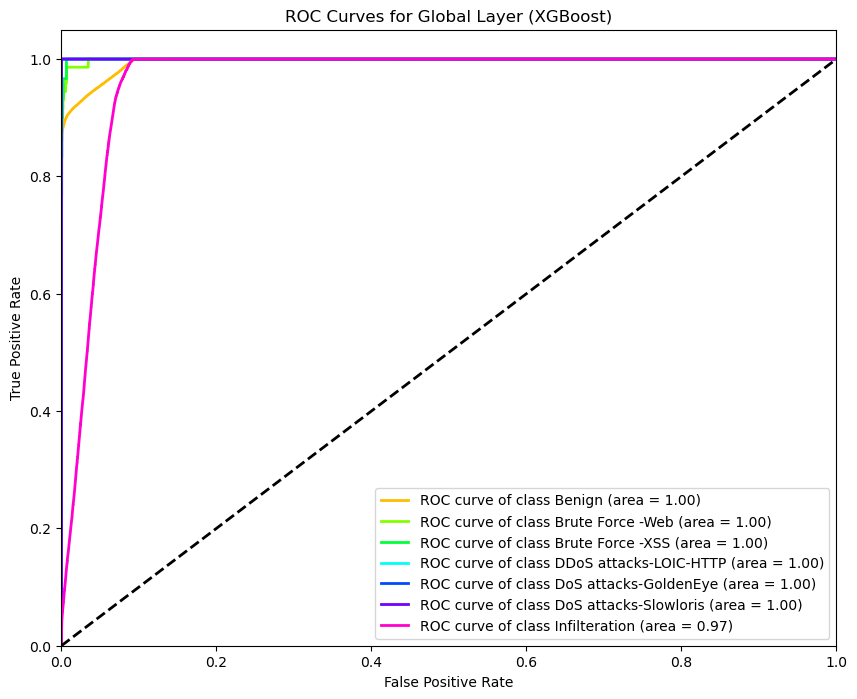

/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_70165/3863999191.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


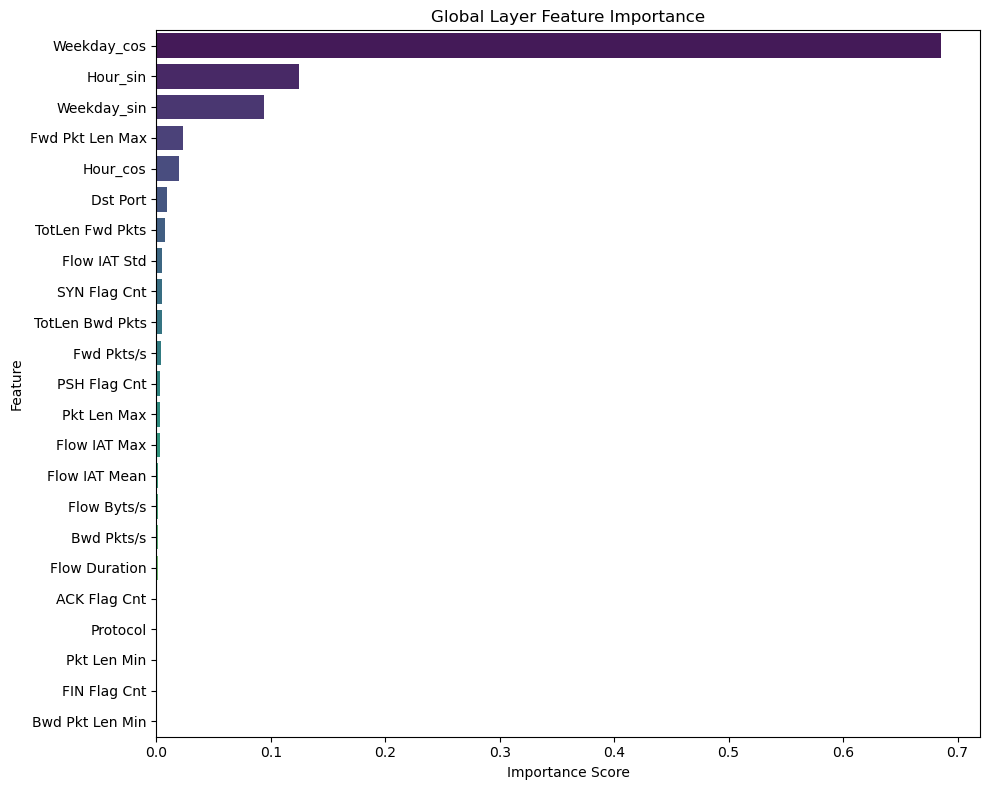

2025-03-25 18:28:54,240 - INFO - XGBoost Global model saved successfully.



Decision Explanation:
The XGBoost model aggregates outputs from an ensemble of decision trees. Each tree outputs a score, and these scores are summed to produce a raw score, which is then transformed into a probability using a logistic (sigmoid) function (see Equation 1).
For each sample, the class with the highest probability is chosen as the prediction. A threshold (e.g., τ_global ≈ 0.3) is used to identify whether the sample is an attack or benign traffic, particularly for specialized applications.
The feature importance plot highlights which attributes have the most impact on the model’s decisions, providing insight into the behavior of volumetric attacks such as DDoS and DoS.


In [2]:
# Global Layer - XGBoost Model for Network Intrusion Detection

import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import logging

# Configure logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)

# === Step 1: Load the dataset ===
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df = pd.read_csv(file_path)
logging.info("Dataset loaded successfully.")

# === Step 2: Define Global Layer Features ===
global_features = [
    "Flow Duration", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "Dst Port", "Protocol", "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Fwd Pkts", "TotLen Bwd Pkts",
    "Hour_sin", "Hour_cos", "Weekday_sin", "Weekday_cos"
]
logging.info("Selecting Global layer features...")

# === Step 3: Prepare data and encode labels ===
X = df[global_features]
y = df["Label"]  # Target variable

# Encode string labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# === Step 4: Split the data into training and testing sets ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
logging.info(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# === Step 5: Train the XGBoost Model ===
logging.info("Starting XGBoost Model Training...")
xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=len(label_encoder.classes_),  # Ensures the model handles all classes
    eval_metric="mlogloss",
    use_label_encoder=False,
    n_estimators=300,   # A larger number of trees can improve performance
    max_depth=7,        # Controls the complexity of each tree
    learning_rate=0.1,  # Step size shrinkage used to prevent overfitting
    subsample=0.8,      # Fraction of observations to be randomly sampled for each tree
    colsample_bytree=0.8,  # Fraction of columns to be randomly sampled for each tree
    scale_pos_weight=1   # Adjust for class imbalance if needed
)
xgb_model.fit(X_train, y_train)
logging.info("XGBoost Model Training Completed.")

# === Step 6: Generate Predictions and Evaluation Metrics ===
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
logging.info(f"Model Accuracy: {accuracy:.4f}")

print(f"Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Generate the confusion matrix for further insight
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# === Step 7: Produce Confidence Scores using predict_proba ===
y_prob = xgb_model.predict_proba(X_test)
# For each instance, the confidence score is the maximum probability among classes.
confidence_scores = np.max(y_prob, axis=1)

# Save predictions and confidence scores to a CSV file for further analysis
results_df = pd.DataFrame({
    "True_Label": y_test,
    "Predicted_Label": y_pred,
    "Confidence_Score": confidence_scores
})
results_df.to_csv("/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/global_layer_results.csv", index=False)
logging.info("Results saved to CSV.")

# === Step 8: Plot ROC Curves for Each Class (One-vs-Rest) ===
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC computation
y_test_binarized = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = sns.color_palette("hsv", n_classes)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Global Layer (XGBoost)')
plt.legend(loc="lower right")
plt.savefig("/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/global_layer_roc.png")
plt.show()

# === Step 9: Plot Feature Importance ===
feature_importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': global_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Global Layer Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/global_layer_feature_importance.png")
plt.show()

# === Step 10: Save the XGBoost Model ===
joblib.dump(xgb_model, "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/xgb_global_model.pkl")
logging.info("XGBoost Global model saved successfully.")

# === Decision Explanation ===
print("\nDecision Explanation:")
print("The XGBoost model aggregates outputs from an ensemble of decision trees. Each tree outputs a score, and these scores are summed to produce a raw score, which is then transformed into a probability using a logistic (sigmoid) function (see Equation 1).")
print("For each sample, the class with the highest probability is chosen as the prediction. A threshold (e.g., τ_global ≈ 0.3) is used to identify whether the sample is an attack or benign traffic, particularly for specialized applications.")
print("The feature importance plot highlights which attributes have the most impact on the model’s decisions, providing insight into the behavior of volumetric attacks such as DDoS and DoS.")

Confusion Matrix:
 [[314315      7      0      0      0      0    412]
 [    33     39      0      0      0      0      0]
 [    10      0     20      0      0      0      0]
 [     0      0      0 115235      0      0      0]
 [     0      0      0      0   8291      0      0]
 [     0      0      0      0      0   2057      0]
 [ 12974      0      0      0      0      0    671]]

Classification Report:
                         precision    recall  f1-score   support

                Benign       0.96      1.00      0.98    314734
      Brute Force -Web       0.85      0.54      0.66        72
      Brute Force -XSS       1.00      0.67      0.80        30
DDoS attacks-LOIC-HTTP       1.00      1.00      1.00    115235
 DoS attacks-GoldenEye       1.00      1.00      1.00      8291
 DoS attacks-Slowloris       1.00      1.00      1.00      2057
         Infilteration       0.62      0.05      0.09     13645

              accuracy                           0.97    454064
             

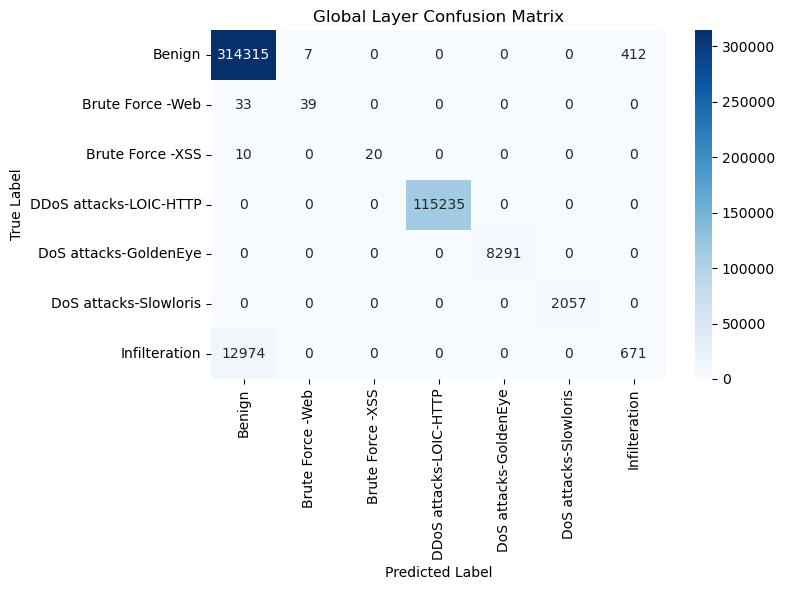

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# === Step: Confusion Matrix Calculation and Visualization ===

# 1. Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 2. Print the classification report for reference
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report:\n", report)

# 3. Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Global Layer Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()